<a href="https://colab.research.google.com/github/firmanwahyu/firman/blob/master/Horse_or_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setting up Data

In [1]:
# Download Data

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2022-06-21 12:30:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 2607:f8b0:4023:c0d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   191MB/s    in 0.7s    

2022-06-21 12:30:01 (191 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2022-06-21 12:30:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.251.2.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (1

In [2]:
# Extract Files

import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [3]:
# Declare variable for files

train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

##Visualizing data

In [4]:
# Accesing Data Names

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse29-2.png', 'horse30-1.png', 'horse45-4.png', 'horse27-1.png', 'horse27-4.png', 'horse17-8.png', 'horse15-0.png', 'horse05-2.png', 'horse15-3.png', 'horse12-8.png']
['human11-27.png', 'human04-30.png', 'human10-25.png', 'human04-19.png', 'human07-27.png', 'human05-18.png', 'human14-09.png', 'human16-19.png', 'human11-15.png', 'human05-23.png']


In [13]:
# Data lengths

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


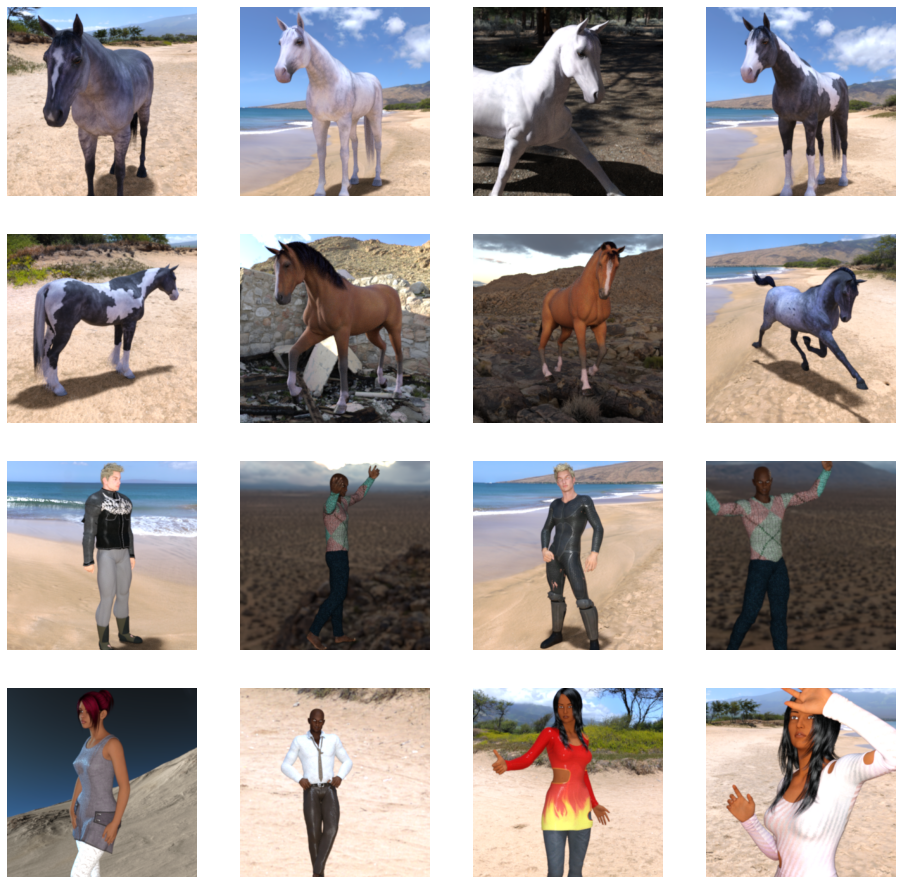

In [6]:
# Show Images

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

##Start

In [14]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [40]:
# Create Model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),activation="relu", input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
                                    ])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 16)      

In [21]:
from tensorflow.keras.optimizers import RMSprop

# Compile model with RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss="binary_crossentropy", metrics =["accuracy"])

## Data Preprocessing

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up Data generator
train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)


In [34]:
# Preprocess Data
train_generator = train_datagen.flow_from_directory(
      '/tmp/horse-or-human/',
      target_size=(300, 300),
      batch_size=128,
      class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(
      '/tmp/validation-horse-or-human/',
      target_size=(300, 300),
      batch_size=32,
      class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [37]:
# Fit model
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs=15,
    steps_per_epoch=8,
    validation_steps=8,
    verbose=1)

Epoch 1/15
8/8 [==============================] - 62s 7s/step - loss: 1.6089 - accuracy: 0.0845 - val_loss: 1.2042 - val_accuracy: 0.0000e+00
Epoch 2/15
8/8 [==============================] - 59s 7s/step - loss: 1.2297 - accuracy: 0.1079 - val_loss: 1.2040 - val_accuracy: 0.0000e+00
Epoch 3/15
8/8 [==============================] - 59s 8s/step - loss: 1.2175 - accuracy: 0.1157 - val_loss: 1.2041 - val_accuracy: 0.0000e+00
Epoch 4/15
8/8 [==============================] - 59s 8s/step - loss: 1.2346 - accuracy: 0.0656 - val_loss: 1.2040 - val_accuracy: 0.0156
Epoch 5/15
8/8 [==============================] - 58s 7s/step - loss: 1.2297 - accuracy: 0.0445 - val_loss: 1.2042 - val_accuracy: 0.0000e+00
Epoch 6/15
8/8 [==============================] - 59s 7s/step - loss: 1.2101 - accuracy: 0.0423 - val_loss: 1.2041 - val_accuracy: 0.0000e+00
Epoch 7/15
8/8 [==============================] - 60s 7s/step - loss: 1.2345 - accuracy: 0.0356 - val_loss: 1.2040 - val_accuracy: 0.0000e+00
Epoch 8/15

In [38]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")